Putting it all together

# 1 Pipeling
we have seen that some estimators can transform data and that some estimator can predict variables. We can also create combined estimator.

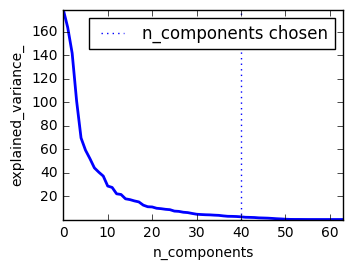

In [7]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
pca.fit(X_digits)
plt.figure(1, figsize=(4,3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components,
                                   logistic__C=Cs))
estimator.fit(X_digits, y_digits)
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
           linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

# 2 Face recongition with eigenface

In [ ]:
from time import time
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.target_names
n_classes = target_names.shape[0]
print('Total dataset size:')
print('n_samples: %d' % n_samples)
print('n_features : %d' % n_features)
print('n_classes: %d' % n_classes )

2017-02-28 10:00:04,192 Downloading LFW metadata: http://vis-www.cs.umass.edu/lfw/pairsDevTrain.txt
2017-02-28 10:00:06,351 Downloading LFW metadata: http://vis-www.cs.umass.edu/lfw/pairsDevTest.txt
2017-02-28 10:00:08,441 Downloading LFW metadata: http://vis-www.cs.umass.edu/lfw/pairs.txt
2017-02-28 10:00:11,864 Downloading LFW data (~200MB): http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
